In [63]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [64]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [65]:
# train_and_validation_images
# train_and_validation_labels
# test_images
# test_labels

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [66]:
train_and_validation_images.shape

(60000, 28, 28)

In [67]:
train_and_validation_labels.shape

(60000,)

In [68]:
test_images.shape

(10000, 28, 28)

In [69]:
test_labels.shape

(10000,)

In [70]:
# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [71]:
val_images = train_and_validation_images[-10000:, :, :]
val_labels = train_and_validation_labels[-10000:]

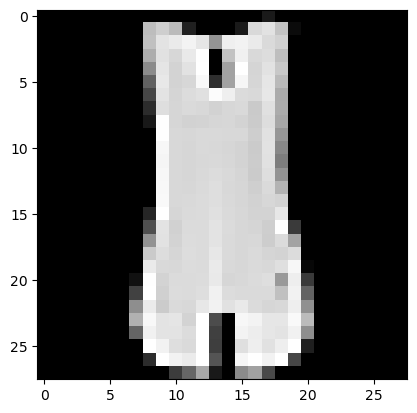

In [72]:
plt.imshow(train_images[4], cmap='gray')

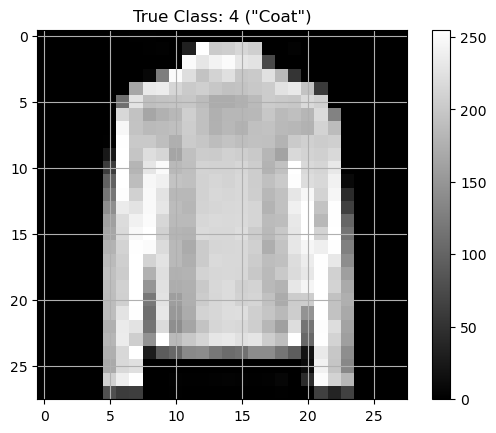

In [73]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(1)

In [74]:
len(train_images)

50000

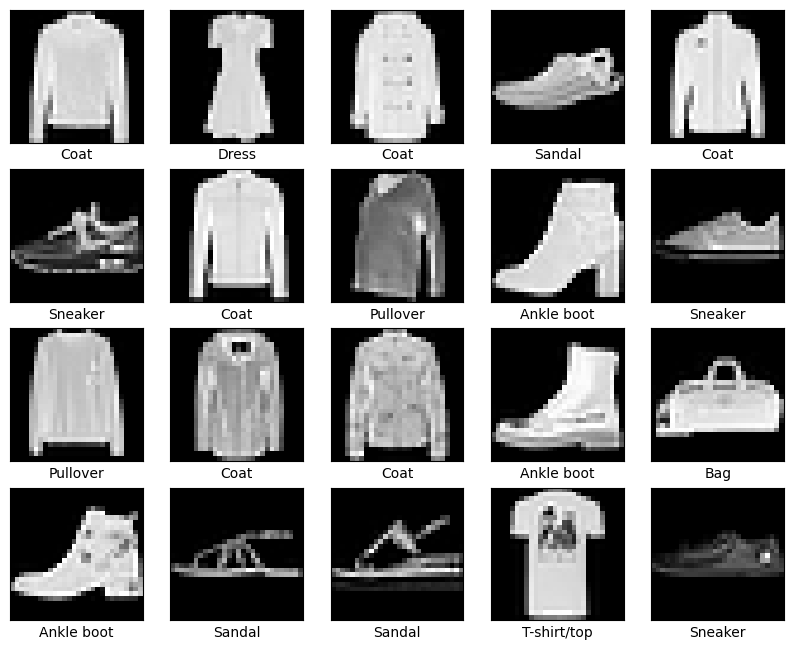

In [75]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

In [76]:
batch_size = 64

In [77]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

In [78]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [79]:
train_dataset = train_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))  

In [80]:
train_dataset_shuffled = train_dataset.shuffle(buffer_size=batch_size * 10)

In [81]:
train_dataset_batched = train_dataset_shuffled.batch(batch_size)

In [82]:
train_dataset_batched

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
val_images = tf.convert_to_tensor(val_images, dtype=tf.float32) / 255.0
val_labels = tf.convert_to_tensor(val_labels, dtype=tf.int32)

In [100]:
train_images = tf.convert_to_tensor(train_images, dtype=tf.float32) / 255.0
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int32) 

In [90]:
# val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

In [91]:
# val_dataset

In [92]:
# val_dataset = val_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))  

In [115]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),  
    
    tf.keras.layers.Dense(256, activation='relu', name='hidden1'),  
    
    tf.keras.layers.Dense(10, activation='relu', name='hidden2'),
    
    tf.keras.layers.Dense(10, activation='softmax', name='last'),  
])

In [116]:
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 hidden2 (Dense)             (None, 10)                2570      
                                                                 
 last (Dense)                (None, 10)                110       
                                                                 
Total params: 203640 (795.47 KB)
Trainable params: 203640 (795.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 0.5549 - accuracy: 0.8070 - val_loss: 2.7154 - val_accuracy: 0.0996
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3920 - accuracy: 0.8588 - val_loss: 3.2780 - val_accuracy: 0.0996
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3452 - accuracy: 0.8731 - val_loss: 3.5327 - val_accuracy: 0.0996
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3196 - accuracy: 0.8826 - val_loss: 3.8319 - val_accuracy: 0.0996
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2966 - accuracy: 0.8907 - val_loss: 4.0497 - val_accuracy: 0.0996


In [118]:
# test_images = tf.convert_to_tensor(test_images, dtype=tf.float32) / 255.0
# test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

In [119]:
metric_values = model.evaluate(x=test_images, y=test_labels)

print('Final TEST performance')
for metric_value, metric_name in zip(metric_values, model.metrics_names):
  print('{}: {}'.format(metric_name, metric_value))

313/313 [==============================] - 1s 4ms/step - loss: 4.3586 - accuracy: 0.1000
Final TEST performance
loss: 4.358593463897705
accuracy: 0.10000000149011612


In [120]:
# tf.keras.utils.plot_model(model, to_file='small_lenet.png', show_shapes=True, show_layer_names=True)
# display.display(display.Image('small_lenet.png'))

In [126]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [127]:
y_pred[0]

array([0.04097515, 0.01015657, 0.00602411, 0.0046079 , 0.00394714,
       0.8581167 , 0.06401993, 0.00678098, 0.00207752, 0.00329406],
      dtype=float32)

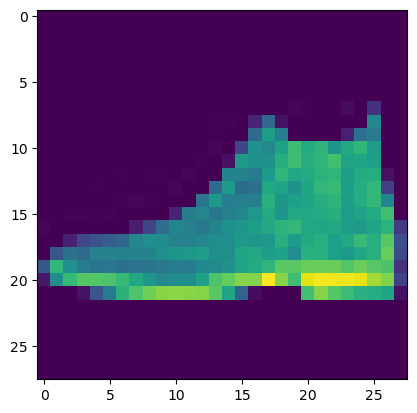

In [129]:
plt.imshow(test_images[0])

In [130]:
y_labels = [np.argmax(i) for i in y_pred]

In [132]:
# cm = tf.math.confusion_matrix(labels=test_images, predictions=y_labels)
# y_labels

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
